# **Homework: Bias, Variance, and Regularization in Linear Regression**
In this homework, you will explore the concepts of bias, variance, and regularization in the context of linear regression. By the end of this assignment, you should be able to:

-  Understand the trade-off between bias and variance.

-  Implement and analyze the effects of regularization (Ridge and Lasso).

-  Diagnose overfitting and underfitting in a model.

## **1. Setup**

First, let's import the necessary libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## **2. Generate Synthetic Data**
We will create a synthetic dataset to work with. The true relationship between the input X and the output y will be a polynomial with some added noise.

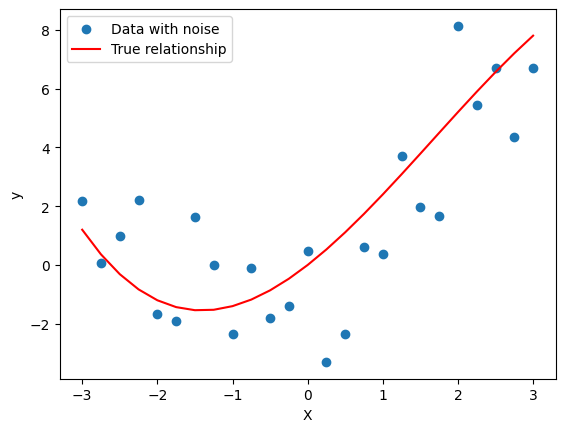

In [ ]:
np.random.seed(42)
X = np.linspace(-3, 3, 25).reshape(-1, 1)
y_true = 2 * X + 0.5 * X**2 - 0.1 * X**3  # True polynomial relationship
y = y_true + np.random.normal(0, 2, size=X.shape)  # Add noise

# Plot the data
plt.scatter(X, y, label="Data with noise")
plt.plot(X, y_true, color='red', label="True relationship")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

##**3. Train-Test Split**
Split the data into training and testing sets to evaluate model performance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##**4. Linear Regression Without Regularization**
Fit a linear regression model to the data and evaluate its performance.

Training MSE: 5.14
Testing MSE: 8.89


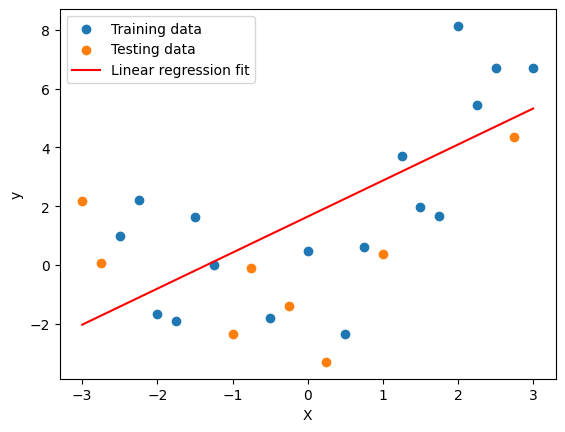

In [ ]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# TODO: Make predictions using the trained model

# TODO: Calculate the mean squared error (MSE) for training and testing sets
# Hint: Use mean_squared_error from sklearn.metrics

print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")

# Plot the results
plt.scatter(X_train, y_train, label="Training data")
plt.scatter(X_test, y_test, label="Testing data")
plt.plot(X, model.predict(X), color='red', label="Linear regression fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

1.   What do you observe about the model's performance on the training and testing sets?

2.   Does the model capture the true relationship well? Why or why not?

```

YOUR ANSWER


```


## **5. Polynomial Regression and Overfitting**
Now, let's fit a polynomial regression model to see how increasing model complexity affects bias and variance.

Training MSE (Polynomial): 1.88
Testing MSE (Polynomial): 4322.98


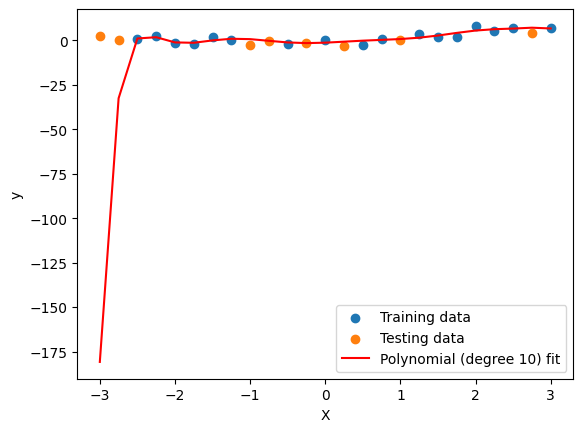

In [ ]:
# Create a polynomial regression model of degree 10
degree = 10
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# TODO: Make predictions using the polynomial regression model

# TODO: Calculate MSE for polynomial regression

print(f"Training MSE (Polynomial): {train_mse_poly:.2f}")
print(f"Testing MSE (Polynomial): {test_mse_poly:.2f}")

# Plot the results
plt.scatter(X_train, y_train, label="Training data")
plt.scatter(X_test, y_test, label="Testing data")
plt.plot(X, poly_model.predict(X), color='red', label=f"Polynomial (degree {degree}) fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

1.   What happens to the training and testing MSE as the model complexity increases?

2.   Is the model overfitting or underfitting? How can you tell?

```

YOUR ANSWER


```




## **6. Regularization: Ridge Regression**
Introduce Ridge regression to control overfitting by adding L2 regularization.


Training MSE (Ridge): 2.29
Testing MSE (Ridge): 63.73


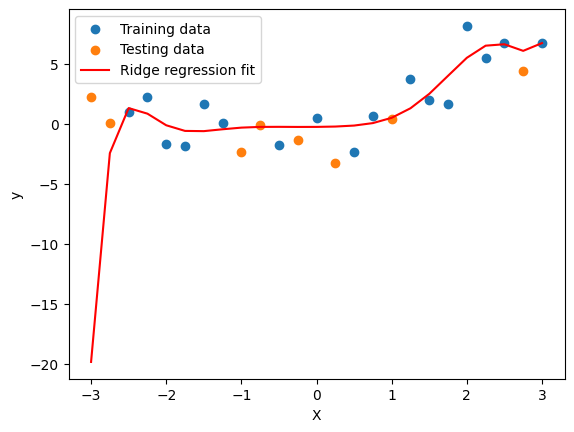

In [ ]:
# Fit a Ridge regression model
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=10.0))
ridge_model.fit(X_train, y_train)

# TODO: Make predictions using Ridge regression

# TODO: Compute MSE for Ridge regression

print(f"Training MSE (Ridge): {train_mse_ridge:.2f}")
print(f"Testing MSE (Ridge): {test_mse_ridge:.2f}")

# Plot the results
plt.scatter(X_train, y_train, label="Training data")
plt.scatter(X_test, y_test, label="Testing data")
plt.plot(X, ridge_model.predict(X), color='red', label="Ridge regression fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

1.  How does Ridge regression affect the model's performance compared to the unregularized polynomial regression?

2.  What is the role of the alpha parameter in Ridge regression?

```

YOUR ANSWER


```


## **7. Regularization: Lasso Regression**
Now, try Lasso regression, which uses L1 regularization to encourage sparsity in the model coefficients.

Training MSE (Lasso): 2.32
Testing MSE (Lasso): 5.34


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.082e+01, tolerance: 1.679e-02
  model = cd_fast.enet_coordinate_descent(


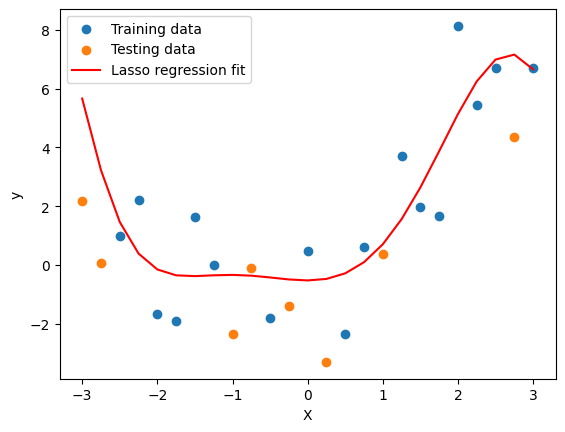

In [ ]:
# Fit a Lasso regression model
lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))
lasso_model.fit(X_train, y_train)

# TODO: Make predictions using Lasso regression

# TODO: Compute MSE for Lasso regression

print(f"Training MSE (Lasso): {train_mse_lasso:.2f}")
print(f"Testing MSE (Lasso): {test_mse_lasso:.2f}")

# Plot the results
plt.scatter(X_train, y_train, label="Training data")
plt.scatter(X_test, y_test, label="Testing data")
plt.plot(X, lasso_model.predict(X), color='red', label="Lasso regression fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

1.  How does Lasso regression differ from Ridge regression in terms of the model's coefficients?

2.  What happens to the model's performance as you change the alpha parameter in Lasso?

```

YOUR ANSWER


```

## **8. Bias-Variance Trade-Off**
Summarize your observations about bias and variance in the models you've trained.


In [ ]:
# Summarize MSE for all models
print("Linear Regression:")
print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
print("\nPolynomial Regression:")
print(f"Train MSE: {train_mse_poly:.2f}, Test MSE: {test_mse_poly:.2f}")
print("\nRidge Regression:")
print(f"Train MSE: {train_mse_ridge:.2f}, Test MSE: {test_mse_ridge:.2f}")
print("\nLasso Regression:")
print(f"Train MSE: {train_mse_lasso:.2f}, Test MSE: {test_mse_lasso:.2f}")

Linear Regression:
Train MSE: 5.14, Test MSE: 8.89

Polynomial Regression:
Train MSE: 1.88, Test MSE: 4322.98

Ridge Regression:
Train MSE: 2.29, Test MSE: 63.73

Lasso Regression:
Train MSE: 2.32, Test MSE: 5.34


1.    How do you tell high bias and variance from the results above? Which model has the highest bias? Which has the highest variance?

2.    How does regularization help balance bias and variance?

```

YOUR ANSWER


```

##**9. Optional: Experiment with Different Parameters**
In this section, you will experiment with different values of degree (for polynomial features) and alpha (for regularization strength) to observe their effects on model performance.

### **9.1. Experiment with Different Polynomial Degrees**
Let's start by varying the degree of the polynomial features while keeping the regularization strength (alpha) fixed.

Degree 1: Train MSE = 5.14, Test MSE = 8.89
Degree 2: Train MSE = 2.80, Test MSE = 3.28
Degree 3: Train MSE = 2.70, Test MSE = 3.84
Degree 5: Train MSE = 2.31, Test MSE = 4.58
Degree 10: Train MSE = 1.88, Test MSE = 4322.98
Degree 15: Train MSE = 0.05, Test MSE = 7643375.49
Degree 20: Train MSE = 0.00, Test MSE = 134557333259.03


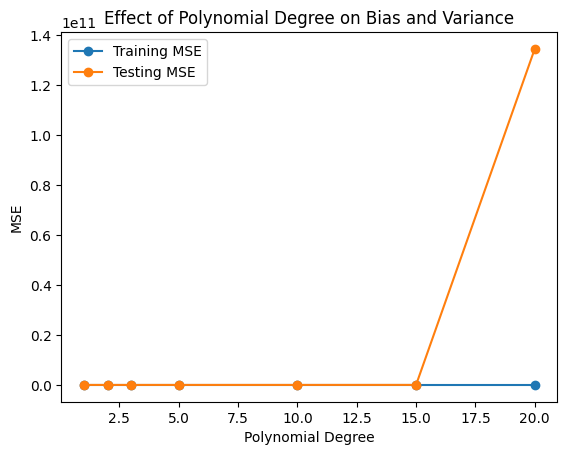

In [ ]:
# Define a range of polynomial degrees to test
degrees = [1, 2, 3, 5, 10, 15, 20]

# Initialize lists to store results
train_mse_list = []
test_mse_list = []

# Loop over degrees
for degree in degrees:
    # Create a polynomial regression model
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train, y_train)

    # TODO: Make predictions using the polynomial regression model

    # TODO: Calculate MSE for polynomial regression

    # Store results
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

    # Print results
    print(f"Degree {degree}: Train MSE = {train_mse:.2f}, Test MSE = {test_mse:.2f}")

# Plot the results
plt.plot(degrees, train_mse_list, label="Training MSE", marker='o')
plt.plot(degrees, test_mse_list, label="Testing MSE", marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Effect of Polynomial Degree on Bias and Variance")
plt.legend()
plt.show()

1.    What happens to the training and testing MSE as the polynomial degree increases?

2.    At what degree does the model start to overfit? How can you tell?

```

YOUR ANSWER


```

##**9.2. Experiment with Different Regularization Strengths (Alpha)**
Now, let's experiment with different values of alpha for Ridge and Lasso regression while keeping the polynomial degree fixed.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.941e+01, tolerance: 1.679e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.944e+01, tolerance: 1.679e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.971e+01, tolerance: 1.679e

Alpha = 0.0001:
  Ridge: Train MSE = 1.88, Test MSE = 4318.64
  Lasso: Train MSE = 2.28, Test MSE = 10.01
Alpha = 0.001:
  Ridge: Train MSE = 1.88, Test MSE = 4280.16
  Lasso: Train MSE = 2.28, Test MSE = 9.92
Alpha = 0.01:
  Ridge: Train MSE = 1.88, Test MSE = 3944.85
  Lasso: Train MSE = 2.28, Test MSE = 9.02
Alpha = 0.1:
  Ridge: Train MSE = 1.93, Test MSE = 2452.19
  Lasso: Train MSE = 2.32, Test MSE = 5.34
Alpha = 1.0:
  Ridge: Train MSE = 2.10, Test MSE = 741.76
  Lasso: Train MSE = 2.92, Test MSE = 32.51
Alpha = 10.0:
  Ridge: Train MSE = 2.29, Test MSE = 63.73
  Lasso: Train MSE = 3.84, Test MSE = 71.27
Alpha = 100.0:
  Ridge: Train MSE = 2.53, Test MSE = 45.26
  Lasso: Train MSE = 5.42, Test MSE = 50.83


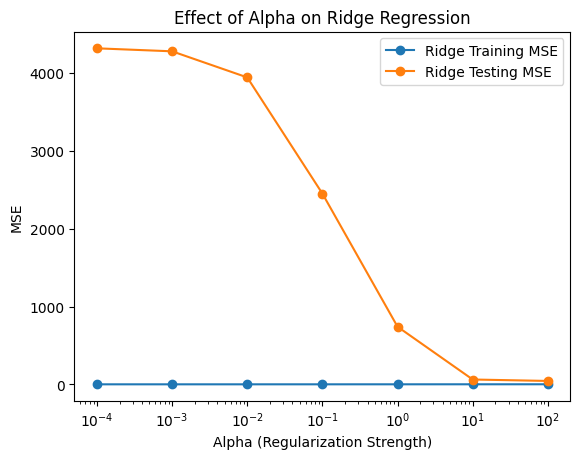

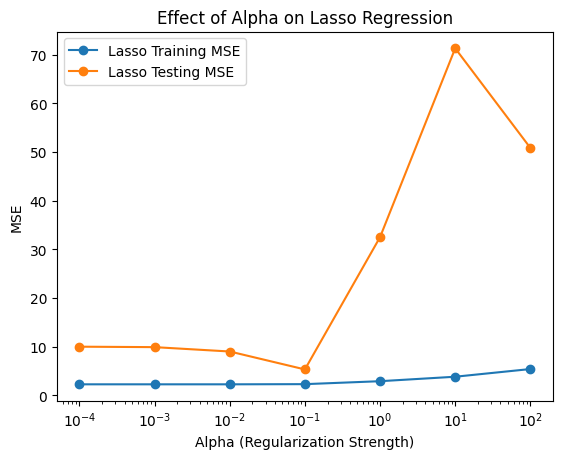

In [ ]:
# Fix the polynomial degree
degree = 10

# Define a range of alpha values to test
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Initialize lists to store results
ridge_train_mse_list = []
ridge_test_mse_list = []
lasso_train_mse_list = []
lasso_test_mse_list = []

# Loop over alphas
for alpha in alphas:
    # Ridge Regression
    ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    ridge_model.fit(X_train, y_train)

    # TODO: Make predictions using Ridge regression

    # TODO: Compute MSE for Ridge regression

    ridge_train_mse_list.append(ridge_train_mse)
    ridge_test_mse_list.append(ridge_test_mse)


    # Lasso Regression
    lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    lasso_model.fit(X_train, y_train)

    # TODO: Make predictions using Lasso regression

    # TODO: Make predictions using Lasso regression

    lasso_train_mse_list.append(lasso_train_mse)
    lasso_test_mse_list.append(lasso_test_mse)

    # Print results
    print(f"Alpha = {alpha}:")
    print(f"  Ridge: Train MSE = {ridge_train_mse:.2f}, Test MSE = {ridge_test_mse:.2f}")
    print(f"  Lasso: Train MSE = {lasso_train_mse:.2f}, Test MSE = {lasso_test_mse:.2f}")

# Plot the results for Ridge
plt.plot(alphas, ridge_train_mse_list, label="Ridge Training MSE", marker='o')
plt.plot(alphas, ridge_test_mse_list, label="Ridge Testing MSE", marker='o')
plt.xscale('log')  # Use log scale for alpha values
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("MSE")
plt.title("Effect of Alpha on Ridge Regression")
plt.legend()
plt.show()

# Plot the results for Lasso
plt.plot(alphas, lasso_train_mse_list, label="Lasso Training MSE", marker='o')
plt.plot(alphas, lasso_test_mse_list, label="Lasso Testing MSE", marker='o')
plt.xscale('log')  # Use log scale for alpha values
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("MSE")
plt.title("Effect of Alpha on Lasso Regression")
plt.legend()
plt.show()

1.    How does the choice of alpha affect the training and testing MSE for Ridge and Lasso regression?

2.    What happens to the model's coefficients as alpha increases? (Hint: Inspect ridge_model.coef_ and lasso_model.coef_ for different alpha values.)

3.    Which regularization method (Ridge or Lasso) performs better for this dataset? Why?


```

YOUR ANSWER


```